


# Introduction to Neural Networks 
Last week we trained a multi-layer perceptron model (a basic kind of neural network) to classify handwritten digits by hand.

In this notebook, we will use existing Python libraries to solve a supervised learning problem, specifically a classification problem using the MNIST dataset. 

We will also furthur our knowledge of neural networks and deep learning through this hands-on example.

In particular, we will discuss how to train and improve the  learning capabilities.  We will be using the PyTorch Python library.

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) contains thousands of examples of handwritten numbers, with each digit labeled 0-9.
<img src="images/mnist_task.png"  align="left"/>



### Import Statements Explained

- `import torch`:  
  This imports the PyTorch library into your Python script, making all the functions and classes of PyTorch available. PyTorch is a popular open-source machine learning library for Python, known for its flexibility and dynamic computational graph, which facilitates the development and training of deep learning models.

- `import torchvision`:  
  Imports the torchvision package, which is a part of the PyTorch project. `torchvision` consists of popular datasets, model architectures, and common image transformations for computer vision. It is particularly useful for loading and preprocessing image data.

- `from torch import nn`:  
  This line specifically imports the `nn` module from PyTorch. The `nn` module contains classes and functions to build neural networks. It includes layers, activation functions, and utilities for constructing, training, and running neural networks.

In [3]:
%matplotlib inline
#This is a magic command (can only use 1 per code block, and must be the first line) for Jupyter notebooks and IPython environments. It ensures that the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The plots will be stored in the notebook document.

import torch
import torchvision
from torch import nn

import numpy 
import matplotlib.pyplot as plt
import time

## The MNIST dataset

We will now download the dataset that contains handwritten digits. MNIST is a popular dataset, so we can download it via the PyTorch library. Note:
- x is for the inputs (images of handwritten digits) and y is for the labels or outputs (digits 0-9)
- We are given "training" and "test" datasets. Training datasets are used to fit the model. Test datasets are saved until the end, when we are satisfied with our model, to estimate how well our model generalizes to new data.

Note that downloading it the first time might take some time.
The data is split as follows:
- 60,000 training examples, 10,000 test examples
- inputs: 1 x 28 x 28 pixels
- outputs (labels): one integer per example 

## MNIST Dataset Loading and Preprocessing

The following code snippet is designed to load and preprocess the MNIST dataset. This process prepares the data for training and testing, specifically for image classification tasks. The torchvision library, which is part of the PyTorch ecosystem, provides convenient access to the MNIST dataset along with preprocessing utilities.

### Key Parameters:

- `root`: Specifies the directory where the dataset will be stored. If the dataset is not already present in this directory, it will be downloaded.
- `train=True`: Indicates that we are fetching the training portion of the dataset.
- `download=True`: Allows the dataset to be downloaded if it's not already available locally.
- `transform=torchvision.transforms.ToTensor()`: Converts a PIL Image or a NumPy ndarray into a FloatTensor and scales the image's pixel intensity values in the range [0., 1.] for model training as PyTorch models operate on tensors.


In [4]:
# Load and transform the training data
training_data = torchvision.datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# Load and transform the test data
# Similar to the training data loader but with 'train=False' to specify that we want to
# load the test (or validation) portion of the MNIST dataset. This data is used to evaluate
# the model's performance on unseen data, providing an estimate of its generalization ability.
test_data = torchvision.datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 28751922.52it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41699034.02it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 14673638.80it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 49481892.90it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Data Splitting Explained

In machine learning projects, it's crucial to split your dataset into training and validation (or test) sets. This separation allows the model to learn from one subset of the data (training set) and then be evaluated on a separate subset (validation set) to check for overfitting, underfitting, and to generally assess the model's performance on unseen data.

The following code snippet performs this splitting operation for a dataset, specifically using PyTorch's utilities. Let's break down the functionality and the purpose of each component in the code.

### Understanding the Code

We are using the `torch.utils.data.random_split` function to divide a dataset into non-overlapping new datasets of given lengths. Specifically, it splits the `training_data` into two parts: a larger portion for training and a smaller portion for validation. Additionally, it employs a random generator with a fixed seed for reproducibility of results.

- `training_data, validation_data` are the new datasets obtained after splitting.
- `torch.utils.data.random_split` is the function used for splitting the dataset.
- `training_data` is the original dataset that we intend to split.
- `[0.8, 0.2]` represents the proportions of the split. However, since `random_split` expects absolute numbers rather than proportions, these values should be calculated based on the actual size of `training_data`.
- `generator=torch.Generator().manual_seed(55)` ensures that the random splitting of the dataset is reproducible. The seed `55` is used to initialize the random generator to a fixed state. You can choose any integer (also note that its not really random if its repeatable). 


In [7]:
total_size = len(training_data)  # Total size of the dataset

# Calculate split sizes
train_size = int(total_size * 0.8)  # 80% of the dataset for training
validation_size = total_size - train_size  # Remaining 20% for validation

# Split the dataset into training and validation sets
training_data, validation_data = torch.utils.data.random_split(
    training_data, [train_size, validation_size],
    generator=torch.Generator().manual_seed(55)  # Ensure reproducibility
)

# 'training_data' now contains the training subset,
# 'validation_data' contains the validation subset.


## Understanding the Structure of our Datasets Current status

The code consists of two print statements designed to output information about the MNIST dataset that has been split into training, validation, and test sets. Additionally, it prints the shape of the input data.

1. **Dataset Size Information**:
- The first print statement displays the number of examples in the training, validation, and test datasets. This is crucial for understanding the distribution of data and ensuring there's enough data for training and validation/testing.
        
2. **Input Shape Information**:
- The second print statement reveals the shape of the input data by accessing the first example of the training dataset. This information is vital for configuring the input layer of your neural network and understanding the data's dimensions.

In [9]:
# Print the size of training, validation, and test datasets
print('MNIST data loaded: train:', len(training_data), 'examples,',
      'validation:', len(validation_data), 'examples,',
      'test:', len(test_data), 'examples')

# Print the shape of the input data by accessing the first example in the training dataset
# Note: training_data[0][0] accesses the first image tensor, and .shape retrieves its dimensions
print('Input shape:', training_data[0][0].shape)


MNIST data loaded: train: 30720 examples, validation: 7680 examples, test: 10000 examples
Input shape: torch.Size([1, 28, 28])


### Visualizing MNIST Digits

Here we inspect the first ten images of the MNIST dataset, showcasing the handwritten digits and their corresponding labels. In machine learning, especially in tasks involving images, visualizing your data is crucial for understanding the nature of the dataset you're working with. This visualization can help in examining the data's quality, understanding the variation within classes, and verifying the preprocessing steps. 

### Code Explanation

The code aims to plot the first ten images from the `training_data` of the MNIST dataset, along with their corresponding labels (classes). Here's a breakdown of what each part does:

1. **Setting Plot Size**:
   - `pltsize=1`: This variable controls the overall figure size ratio.
   
2. **Creating Figure**:
   - `plt.figure(figsize=(10*pltsize, pltsize))`: Initializes a new figure with a specific size. The figure's width is 10 times the `pltsize`, and its height is equal to `pltsize`, aiming to create a row of images. The use of `pltsize` here affects the overall figure size but not individual images directly.

3. **Looping Through Images**:
   - The loop `for i in range(10):` iterates through the first ten items in the `training_data`.
   
4. **Plotting Each Image**:
   - Within the loop, `plt.subplot(1, 10, i+1)` creates a subplot for each image in a 1x10 grid.
   - `plt.axis('off')` removes the axis for clarity.
   - `plt.imshow(numpy.reshape(training_data[i][0], (28, 28)), cmap="gray")` displays an image. The [`numpy.reshape` function](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) changes the shape of the image data to 28x28 pixels, and `cmap="gray"` sets the colormap to grayscale.
   - `plt.title('Class: '+str(training_data[i][1]))`: Adds a title to each subplot indicating the class of the digit.


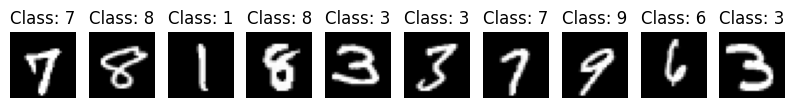

In [10]:
import matplotlib.pyplot as plt
import numpy

pltsize = 1
# Initialize figure with dimensions proportional to the number of images
plt.figure(figsize=(10*pltsize, pltsize))

# Display the first 10 images from the training dataset
for i in range(10):
    plt.subplot(1, 10, i+1)  # Prepare subplot for the ith image
    plt.axis('off')  # Hide the axis for a cleaner look
    # Display the image, reshaping it to 28x28 pixels, in grayscale
    plt.imshow(numpy.reshape(training_data[i][0], (28, 28)), cmap="gray")
    # Add a title with the class of the digit
    plt.title('Class: '+str(training_data[i][1]))


In [ ]:
import torch

# Define the batch size for loading the data
batch_size = 128

# Initialize a DataLoader for the training dataset
# This allows iterating over the dataset in batches of 128 samples, facilitating efficient training
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size)

# Similarly, initialize a DataLoader for the validation dataset
# This enables efficient evaluation of the model on the validation set, also in batches of 128 samples
val_dataloader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size)


# Generalities:
To train our classifier, we need (besides the data):
- A model that depend on parameters $\mathbf{\theta}$. Here we are going to use neural networks.
- A loss function $J(\mathbf{\theta})$ to measure the capabilities of the model.
- An optimization method.

# Linear Model
Let's begin with a simple linear model: linear regression, like last week. 
We add one complication: each example is a vector (flattened image), so the "slope" multiplication becomes a dot product. If the target output is a vector as well, then the multiplication becomes matrix multiplication. 

Note, like before, we consider multiple examples at once, adding another dimension to the input. 


 <img src="images/LinearModel_1.png"  align="center"/>
 


The linear layers in PyTorch perform a basic $xW + b$. These "fully connected" layers connect each input to each output with some weight parameter. 

We wouldn't expect a simple linear model $f(x) = xW+b$ directly outputting the class label and minimizing mean squared error to work well - the model would output labels like 3.55 and 2.11 instead of skipping to integers.

Let's make two changes that make more sense for classification:
- Change the output to be a length-10 vector of class probabilities (0 to 1, adding to 1).
- Cross entropy as the loss function, which is typical for classification. You can read more [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/). 

In [ ]:
class LinearClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        
        # First, we need to convert the input image to a vector by using 
        # nn.Flatten(). For MNIST, it means the second dimension 28*28 becomes 784.
        self.flatten = nn.Flatten()
        
        # Here, we add a fully connected ("dense") layer that has 28 x 28 = 784 input nodes 
        #(one for each pixel in the input image) and 10 output nodes (for probabilities of each class).
        self.layer_1 = nn.Linear(28*28, 10)
        
    def forward(self, x):

        x = self.flatten(x)
        x = self.layer_1(x)

        return x

We now need:
- A loss function $J(\theta)$ where $\theta$ is the list of parameters (here W and b). Last week, we used mean squared error (MSE), but this time we're switching to cross entropy since it's classification.  

- An optimization method or optimizer such as the stochastic gradient descent (sgd) method, the Adam optimizer, RMSprop, Adagrad etc. Let's start with stochastic gradient descent (sgd), like last week. For far more information about more advanced optimizers than basic SGD, with some cool animations, see https://ruder.io/optimizing-gradient-descent/ or https://distill.pub/2017/momentum/.

- A learning rate. As we learned last week, the learning rate controls how far we move during each step. 

In [ ]:
linear_model = LinearClassifier()
print(linear_model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)

# Learning
Now we are ready to train our first model. A training step is comprised of:
- A forward pass: the input is passed through the network
- Backpropagation: A backward pass to compute the gradient $\frac{\partial J}{\partial \mathbf{W}}$ of the loss function with respect to the parameters of the network.
- Weight updates $\mathbf{W} = \mathbf{W} - \alpha \frac{\partial J}{\partial \mathbf{W}} $ where $\alpha$ is the learning rate.

How many steps do we take?
- The batch size corresponds to the number of training examples in one pass (forward + backward). A smaller batch size allows the model to learn from individual examples but takes longer to train. A larger batch size requires fewer steps but may result in the model not capturing the nuances in the data. The higher the batch size, the more memory you will require.  
- An epoch means one pass through the whole training data (looping over the batches). Using few epochs can lead to underfitting and using too many can lead to overfitting.
- The choice of batch size and learning rate are important for performance, generalization and accuracy in deep learning.






In [ ]:
def train_one_epoch(dataloader, model, loss_fn, optimizer):
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # forward pass
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # backward pass calculates gradients
        loss.backward()
        
        # take one step with these gradients
        optimizer.step()
        
        # resets the gradients 
        optimizer.zero_grad()

In [ ]:
def evaluate(dataloader, model, loss_fn):
    # Set the model to evaluation mode - some NN pieces behave differently during training
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    loss, correct = 0, 0

    # We can save computation and memory by not calculating gradients here - we aren't optimizing 
    with torch.no_grad():
        # loop over all of the batches
        for X, y in dataloader:
            pred = model(X)
            loss += loss_fn(pred, y).item()
            # how many are correct in this batch? Tracking for accuracy 
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    loss /= num_batches
    correct /= size
    
    accuracy = 100*correct
    return accuracy, loss

In [ ]:
%%time

epochs = 5
for j in range(epochs):
    train_one_epoch(train_dataloader, linear_model, loss_fn, optimizer)
    
    # checking on the training loss and accuracy once per epoch
    acc, loss = evaluate(train_dataloader, linear_model, loss_fn)
    print(f"Epoch {j}: training loss: {loss}, accuracy: {acc}")

In [ ]:
# Visualize how the model is doing on the first 10 examples
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))
linear_model.eval()
batch = next(iter(train_dataloader))
predictions = linear_model(batch[0])

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(batch[0][i,0,:,:], cmap="gray")
    plt.title('%d' % predictions[i,:].argmax())

Exercise: How can you improve the accuracy? Some things you might consider: increasing the number of epochs, changing the learning rate, etc. 

# Inference

For a better measure of the quality of the model, let's see the model accuracy for the validation data.



In [ ]:
acc_val, loss_val = evaluate(val_dataloader, linear_model, loss_fn)
print("Validation loss: %.4f, validation accuracy: %.2f%%" % (loss_val, acc_val))

We can now take a closer look at the results.

Let's define a helper function to show the failure cases of our classifier.

In [ ]:
def show_failures(model, dataloader, maxtoshow=10):
    model.eval()
    batch = next(iter(dataloader))
    predictions = model(batch[0])
    
    rounded = predictions.argmax(1)
    errors = rounded!=batch[1]
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parentheses.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(batch[0].shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(batch[0][i,0,:,:], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], batch[1][i]))
            ii = ii + 1

Here are the first 10 images from the validation data that this small model classified to a wrong class:



In [ ]:
show_failures(linear_model, val_dataloader)

<!-- # Exercise:
- Try changing the loss function,
- Try changing the optimizer -->

# Multilayer Model
Our linear model isn't enough for high accuracy on this dataset. To improve the model, we often need to add more layers and nonlinearities.
<img src="images/shallow_nn.png"  align="left"/>

The output of this NN can be written as
\begin{equation}\label{eq: NN1d}
  \hat{u}(x) = \sigma_2(\sigma_1(\mathbf{x}\mathbf{W}_1 + \mathbf{b}_1)\mathbf{W}_2 + \mathbf{b}_2),
\end{equation}
where $\mathbf{x}$ is the input, $\mathbf{W}_j$ are the weights of the neural network, $\sigma_j$ the (nonlinear) activation functions, and $\mathbf{b}_j$ its biases. The activation function introduces the nonlinearity and makes it possible to learn more complex tasks. Desirable properties in an activation function include being differentiable, bounded, and monotonic.


Image source: [PragatiBaheti](https://www.v7labs.com/blog/neural-networks-activation-functions)
<img src="images/activation.jpeg"  align="center"/>

Adding more layers to obtain a deep neural network:
<img src="images/deep_nn.png"  align="left"/>



# Important things to know
Deep Neural networks can be overly flexible/complicated and "overfit" your data, just like fitting overly complicated polynomials:
<img src="images/bias_vs_variance.png"  align="left"/>

To improve the generalization of our model on previously unseen data, we employ a technique known as regularization, which constrains our optimization problem in order to discourage complex models.

  - Dropout is the commonly used regularization technique. The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
  - Penalizing the loss function by adding a term such as $\lambda ||\mathbf{W}||^2$ is alsp a commonly used regularization technique. This helps "control" the magnitude of the weights of the network.
    
<!--  <img src="images/test_data_rule.png" width="800" hight="500" align="center"/>
  -->

We can now implement a deep network in PyTorch. nn.Dropout() performs the Dropout operation mentioned earlier

In [ ]:
class NonlinearClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Linear(28*28, 50),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.Linear(50, 50),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.Linear(50, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.layers_stack(x)

        return x

# Homework: train a Nonlinear Classifier

1. Write some code to train the NonlinearClassifier.
2. Create a data loader for the test data and check your model's accuracy on the test data. 

If you have time, experiment with how to improve the model. Note: training and validation data can be used to compare models, but test data should be saved until the end as a final check of generalization. 

# JupyterHub Reminder

From [Homework 0](https://github.com/argonne-lcf/ai-science-training-series/blob/main/00_introToAlcf/02_jupyterNotebooks.md): "If you simply close your browser window, or logout without shutting down the jupyter server, your job will continue to occupy the worker node. Be considerate and shutdown your job when you finish."

File --> Hub Control Panel --> Stop my server